In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monthly-gold-prices/1990-2021.csv
/kaggle/input/monthly-gold-prices/1979-2021.csv
/kaggle/input/daily-coffee-price/coffee.csv


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
rcParams['figure.figsize'] = 10,8

In [3]:
df = pd.read_csv('/kaggle/input/monthly-gold-prices/1990-2021.csv')
df.head()

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
0,31-01-1990,415.1,321.3,59972.3,247.1,492.0,623.8,7041.0,1930.2,1.0,1557.4,745400.5,1524.9,10623.3,1867170.0,1059.9,283240.8,540.0,1063.2
1,28-02-1990,407.7,316.2,60672.5,241.2,485.7,607.9,6957.4,1936.8,1.0,1527.7,747408.3,1496.0,10494.1,1853648.1,1085.6,282356.4,534.1,1040.4
2,30-03-1990,368.5,283.9,57987.1,223.7,431.0,550.8,6334.4,1717.1,0.9,1376.8,652783.7,1348.1,9506.1,1622520.2,947.3,257424.6,488.4,976.9
3,30-04-1990,367.8,280.7,58375.7,224.3,428.3,533.9,6379.3,1739.6,0.9,1370.0,669724.5,1341.5,9510.6,1651644.8,982.5,258294.2,488.9,975.8
4,31-05-1990,363.1,280.2,55420.9,216.5,426.2,520.1,6295.5,1717.4,0.9,1371.7,671905.9,1343.2,9352.3,1646877.6,988.3,261068.1,472.2,967.3


In [4]:
df.shape

(379, 19)

In [5]:
def generate_report(data):
    print(data.info())
    print(data.describe())

In [6]:
generate_report(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       379 non-null    object 
 1   United States(USD)         379 non-null    float64
 2   Europe(EUR)                379 non-null    float64
 3   Japan(JPY)                 379 non-null    float64
 4   United Kingdom(GBP)        379 non-null    float64
 5   Canada(CAD)                379 non-null    float64
 6   Switzerland(CHF)           379 non-null    float64
 7   India(INR)                 379 non-null    float64
 8   China(CNY)                 379 non-null    float64
 9   Turkey(TRY)                379 non-null    float64
 10  Saudi Arabia(SAR)          379 non-null    float64
 11  Indonesia(IDR)             379 non-null    float64
 12  United Arab Emirates(AED)  379 non-null    float64
 13  Thailand(THB)              379 non-null    float64

In [7]:
df.isnull().sum().sort_values(ascending=False)

Date                         0
Saudi Arabia(SAR)            0
Australia(AUD)               0
South Korean(KRW)            0
Egypt(EGP)                   0
Vietnam(VND)                 0
Thailand(THB)                0
United Arab Emirates(AED)    0
Indonesia(IDR)               0
Turkey(TRY)                  0
United States(USD)           0
China(CNY)                   0
India(INR)                   0
Switzerland(CHF)             0
Canada(CAD)                  0
United Kingdom(GBP)          0
Japan(JPY)                   0
Europe(EUR)                  0
South Africa(ZAR)            0
dtype: int64

<AxesSubplot:xlabel='Date'>

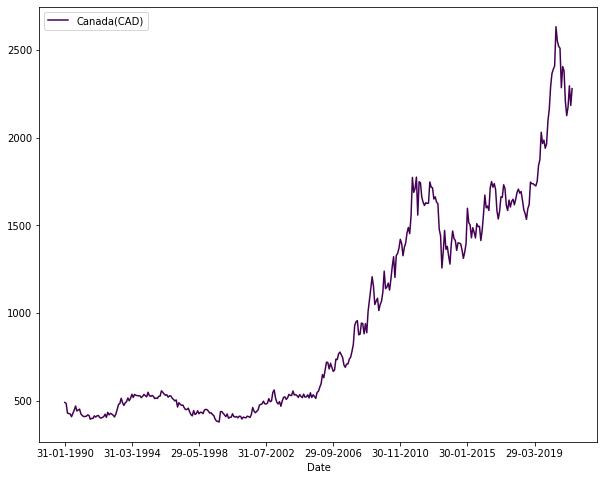

In [8]:
ax = plt.gca()
df.plot(x="Date", y="Canada(CAD)",cmap="viridis", ax = ax)
#df.plot(x="Date", y="China(CNY)",cmap="viridis", ax = ax, alpha=0.5)
#df.plot(x="Date", y="Low", color="#e6ccb2", ax=ax)

<AxesSubplot:xlabel='Date'>

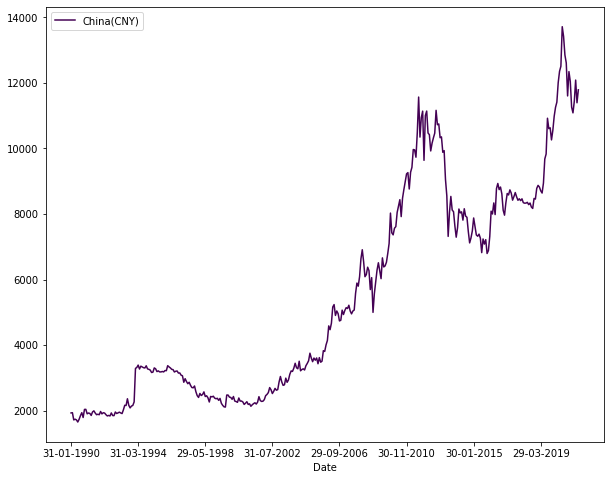

In [9]:
ax = plt.gca()
df.plot(x="Date", y="China(CNY)",cmap="viridis", ax = ax)

<AxesSubplot:xlabel='China(CNY)', ylabel='Canada(CAD)'>

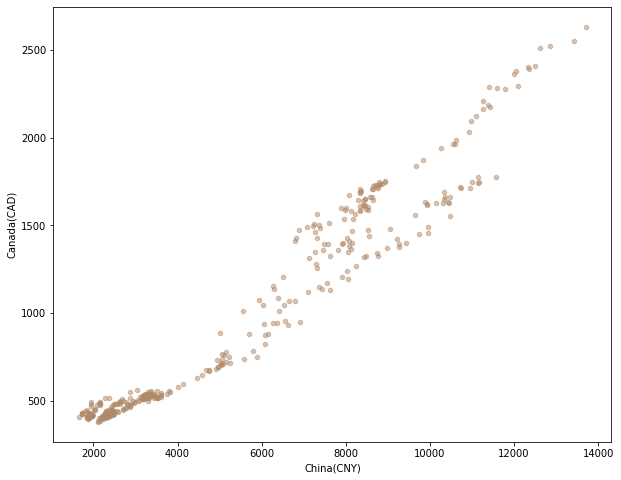

In [10]:
df.plot(x="China(CNY)", y="Canada(CAD)", kind="scatter", color="#b08968", alpha=0.5)

In [11]:
X = df[['Canada(CAD)']]
y = df[['China(CNY)']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)

(341, 1)
(341, 1)


In [14]:
def train_linReg(features, labels):
    lin_reg = LinearRegression()
    lin_reg.fit(features, labels)
    return lin_reg
    

In [15]:
lin_reg = train_linReg(X_train, y_train)

In [16]:
print(lin_reg.intercept_, lin_reg.coef_)

[333.14968263] [[5.35217103]]


In [17]:
y_pred = lin_reg.predict(X_test)

In [18]:
lin_reg.score(X_test, y_test)

0.9702021129297662

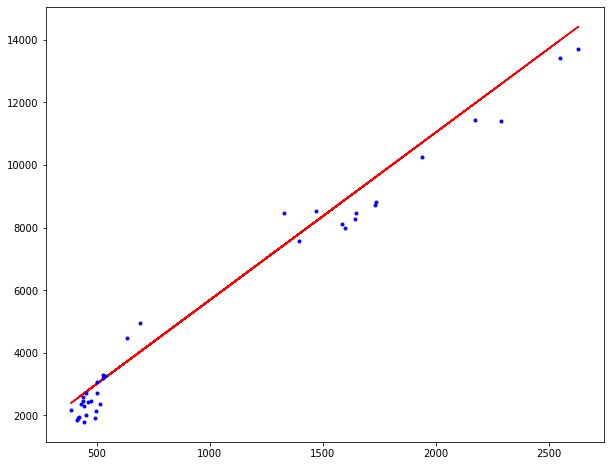

In [19]:
plt.plot(X_test, y_pred, "r-")
plt.plot(X_test, y_test, "b.")

plt.show()